In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from glob import glob
from collections import OrderedDict

import matplotlib.gridspec as gridspec

In [27]:
# l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'atom', 'oe', 'rowl', 'csi', 'prood', 'vit_hf_md']
l_model = [ 'good',  'ssd', 'md', 'atom', 'prood', 'vit_hf_md']
# dataset = 'celeba'
data = OrderedDict()
for m in l_model:
    data[m] = {}

In [28]:
dataset ='svhn' 
var = dataset
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/sample.pkl')
    scores = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/score.pkl')
    rank = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/rank.pkl')
    # x = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/{m}/{m}_{dataset}_stylegan2_mh_x.pkl')
    # score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(scores)
    sorted_x = x[sort_idx]
    # in_score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/pretrained/{identifier}/IN_score.pkl').sort().values
    # rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank[sort_idx]
    data[m][var]['select'] = list(range(16))

In [29]:
dataset ='celeba' 
var = dataset
for m, identifier in zip(l_model, l_identifier):
    x = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/sample.pkl')
    scores = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/score.pkl')
    rank = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/rank.pkl')
    # x = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/{m}/{m}_{dataset}_stylegan2_mh_x.pkl')
    # score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(scores)
    sorted_x = x[sort_idx]
    # in_score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/pretrained/{identifier}/IN_score.pkl').sort().values
    # rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank[sort_idx]
    data[m][var]['select'] = list(range(16))

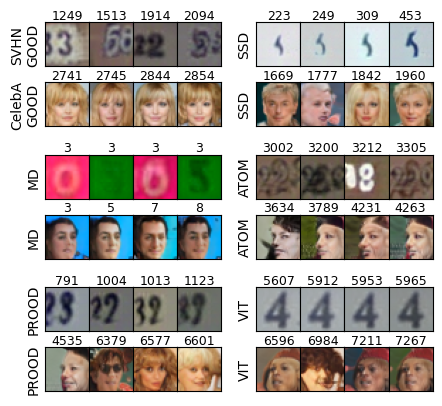

In [35]:
fig = plt.figure(figsize=(5,5))
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.1,)

for m_idx, (m, m_data) in enumerate(data.items()):
    if m == 'vit_hf_md':
        m = 'vit'
    
    i_c, i_r = m_idx % 2, m_idx // 2

    plt_a = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; var = 'svhn'
    ax = plt.Subplot(fig, plt_a[0])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    if m == 'good':
        ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 4; var = 'celeba'; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    if m == 'good':
        ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 5; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 6; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i = 7; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    if m_idx == 7: break
    
# m_idx = 8; m_data = data[l_model[m_idx]]; m = l_model[m_idx]
# i_r, i_c = 2, 0
# plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
# i = 0; var = 'svhn'
# ax = plt.Subplot(fig, plt_a[0])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
# # if m == 'nae' or m == 'ssd':
# ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
# # else:
# # ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 1
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 2
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 3
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# i_r, i_c = 2, 1
# plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
# i = 0; var = 'celeba'; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
# # ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 1; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 2; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# i = 3; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# m_idx = 9; m_data = data[l_model[m_idx]]; m = l_model[m_idx]
# i_r, i_c = 2, 2
# plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
# i = 0; var = 'svhn'; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))

# ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 1; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 2; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# i = 3; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# i_r, i_c = 2, 3
# plt_a = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
# i = 0; var = 'celeba'; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))

# ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 1; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

# i = 2; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


# i = 3; i_var = i
# ax = plt.Subplot(fig, plt_a[i])
# ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
# ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
# fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])


fig.savefig('fig_gan_svhn_celeba.pdf', bbox_inches='tight')

# Full

In [8]:
l_model = ['nae', 'good', 'acet', 'ceda', 'ssd', 'md', 'prood', 'atom', 'oe', 'rowl', 'csi', 'vit_hf_md']
# l_model = [ 'good',  'ssd', 'md', 'atom', 'prood', 'vit_hf_md']
# dataset = 'celeba'
data = OrderedDict()
for m in l_model:
    data[m] = {}

In [9]:
dataset ='svhn' 
var = dataset
for m in l_model:
    x = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/sample.pkl')
    scores = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/score.pkl')
    rank = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/rank.pkl')
    # x = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/{m}/{m}_{dataset}_stylegan2_mh_x.pkl')
    # score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(scores)
    sorted_x = x[sort_idx]
    # in_score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/pretrained/{identifier}/IN_score.pkl').sort().values
    # rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank[sort_idx]
    data[m][var]['select'] = list(range(16))
    
    
dataset ='celeba' 
var = dataset
for m in l_model:
    x = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/sample.pkl')
    scores = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/score.pkl')
    rank = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_pgstylegan2_z16_mh/rank.pkl')
    # x = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/{m}/{m}_{dataset}_stylegan2_mh_x.pkl')
    # score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(scores)
    sorted_x = x[sort_idx]
    # in_score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/pretrained/{identifier}/IN_score.pkl').sort().values
    # rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank[sort_idx]
    data[m][var]['select'] = list(range(16))

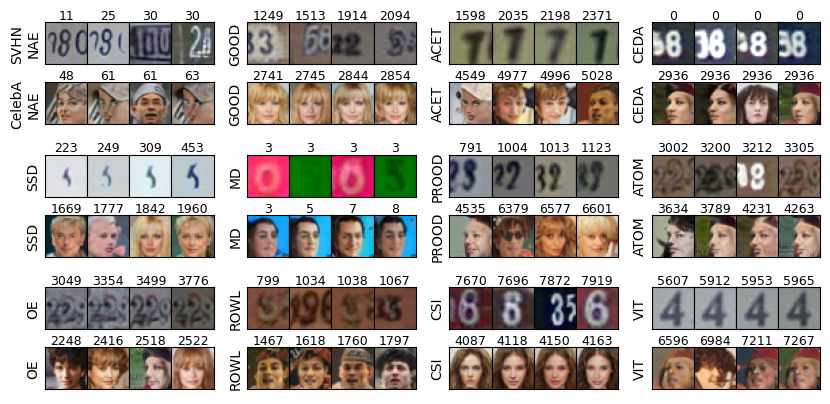

In [16]:
fig = plt.figure(figsize=(10,5))
outer = gridspec.GridSpec(3, 4, wspace=0.2, hspace=0.1,)

for m_idx, (m, m_data) in enumerate(data.items()):
    if m == 'vit_hf_md':
        m = 'vit'
    
    i_c, i_r = m_idx % 4, m_idx // 4

    plt_a = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; var = 'svhn'
    ax = plt.Subplot(fig, plt_a[0])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    if m == 'nae':
        ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 4; var = 'celeba'; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    if m == 'nae':
        ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 5; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 6; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i = 7; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    


fig.savefig('fig_all_gan_svhn_celeba.pdf', bbox_inches='tight', dpi=300)

In [17]:
dataset ='svhn' 
var = dataset
for m in l_model:
    x = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_colorV1_mh/sample.pkl')
    scores = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_colorV1_mh/score.pkl')
    rank = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_colorV1_mh/rank.pkl')
    # x = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/{m}/{m}_{dataset}_stylegan2_mh_x.pkl')
    # score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(scores)
    sorted_x = x[sort_idx]
    # in_score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/pretrained/{identifier}/IN_score.pkl').sort().values
    # rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank[sort_idx]
    data[m][var]['select'] = list(range(16))
    
    
dataset ='celeba' 
var = dataset
for m in l_model:
    x = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_colorV1_mh/sample.pkl')
    scores = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_colorV1_mh/score.pkl')
    rank = torch.load(f'../results/CIFAR10/pairwise/{m}/{m}/{dataset}_colorV1_mh/rank.pkl')
    # x = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/{m}/{m}_{dataset}_stylegan2_mh_x.pkl')
    # score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/results/pairwise/{dataset}/stylegan2/cifar_{m}/cifar_{m}_{dataset}_stylegan2_mh_score.pkl')
    sort_val, sort_idx = torch.sort(scores)
    sorted_x = x[sort_idx]
    # in_score = torch.load(f'/opt/home3/swyoon/evaluation-via-generation/src/pretrained/{identifier}/IN_score.pkl').sort().values
    # rank = np.searchsorted(in_score, sort_val)
    data[m][var] = {}
    data[m][var]['x'] = sorted_x
    data[m][var]['in_score'] = sorted_x
    data[m][var]['rank'] = rank[sort_idx]
    data[m][var]['select'] = list(range(16))

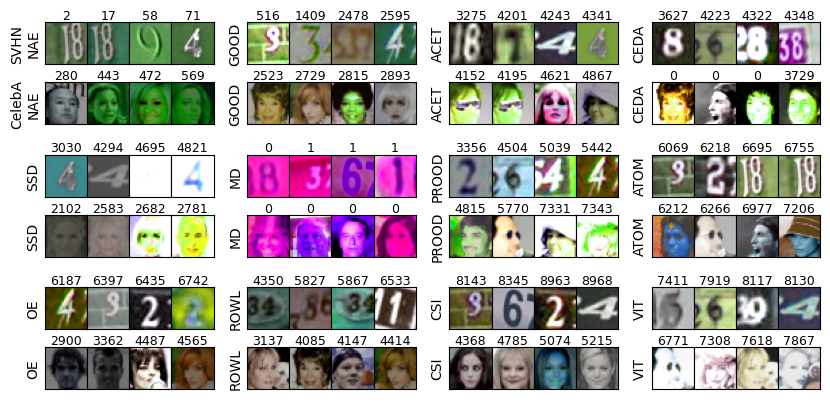

In [18]:
fig = plt.figure(figsize=(10,5))
outer = gridspec.GridSpec(3, 4, wspace=0.2, hspace=0.1,)

for m_idx, (m, m_data) in enumerate(data.items()):
    if m == 'vit_hf_md':
        m = 'vit'
    
    i_c, i_r = m_idx % 4, m_idx // 4

    plt_a = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=outer[i_r, i_c], wspace=0., hspace=0.)
    i = 0; var = 'svhn'
    ax = plt.Subplot(fig, plt_a[0])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    if m == 'nae':
        ax.set_ylabel(f'SVHN\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 1
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 2
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 3
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 4; var = 'celeba'; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    if m == 'nae':
        ax.set_ylabel(f'CelebA\n{m.upper()}', labelpad=0., fontsize=10)
    else:
        ax.set_ylabel(f'{m.upper()}', labelpad=0., fontsize=10)
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 5; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    i = 6; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    
    i = 7; i_var = i - 4
    ax = plt.Subplot(fig, plt_a[i])
    ax.imshow(m_data[var]['x'][m_data[var]['select'][i_var]].permute(1,2,0))
    ax.set_title(f'{m_data[var]["rank"][i_var]}', pad=0., fontsize=9)
    fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    


fig.savefig('fig_all_color_svhn_celeba.pdf', bbox_inches='tight', dpi=300)